## Capstone Project Working Copy

# <p style="font-size:40px ; color:blue" align="center">Capstone: Enron Emails Analysis Using NLP and Time Series</p> <sub>By Stephanie, Paige, Rajaram, Kan - 14 March 2022</sub>

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Overview  </br>
    
## Project Description: What is the morale of your company?


## Goal: 


## Support:

In [337]:
# Import Needed Libararies
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Acquire  </br>
- ???

In [338]:
# read original df into pandas dataframe
df = pd.read_csv('emails.csv')
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [339]:
df.shape

(517401, 2)

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Prepare  </br>
- ???

## See Message Body

In [340]:
df.message.values

array(["Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n ",
       "Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-

## Parse Emails for Date, Content

In [341]:
from email.parser import Parser

bodies = []
dates = []
senders = []
subjects = []

# loop through email messages
for i in df.message:
    # parse and set message to email data type
    headers = Parser().parsestr(i)
    # get the body text of the email
    body = headers.get_payload()
    # get the date from email
    date = headers['Date']
    # get sender of email
    sender = headers['From']
    # get email subject
    subject = headers['Subject']
    # append date, body, sender, subjectg text to lists
    bodies.append(body)
    dates.append(date)
    senders.append(sender)
    subjects.append(subject)

In [342]:
# show list of email text
bodies

['Here is our forecast\n\n ',
 "Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n",
 'test successful.  way to go!!!',
 'Randy,\n\n Can you send me a schedule of the salary and level of everyone in the \nscheduling group.  Plus your thoughts on any changes t

In [343]:
# show list of dates
dates

['Mon, 14 May 2001 16:39:00 -0700 (PDT)',
 'Fri, 4 May 2001 13:51:00 -0700 (PDT)',
 'Wed, 18 Oct 2000 03:00:00 -0700 (PDT)',
 'Mon, 23 Oct 2000 06:13:00 -0700 (PDT)',
 'Thu, 31 Aug 2000 05:07:00 -0700 (PDT)',
 'Thu, 31 Aug 2000 04:17:00 -0700 (PDT)',
 'Tue, 22 Aug 2000 07:44:00 -0700 (PDT)',
 'Fri, 14 Jul 2000 06:59:00 -0700 (PDT)',
 'Tue, 17 Oct 2000 02:26:00 -0700 (PDT)',
 'Mon, 16 Oct 2000 06:44:00 -0700 (PDT)',
 'Mon, 16 Oct 2000 06:42:00 -0700 (PDT)',
 'Fri, 13 Oct 2000 06:45:00 -0700 (PDT)',
 'Mon, 9 Oct 2000 07:16:00 -0700 (PDT)',
 'Mon, 9 Oct 2000 07:00:00 -0700 (PDT)',
 'Thu, 5 Oct 2000 06:26:00 -0700 (PDT)',
 'Thu, 5 Oct 2000 05:55:00 -0700 (PDT)',
 'Wed, 4 Oct 2000 09:23:00 -0700 (PDT)',
 'Fri, 4 May 2001 11:26:00 -0700 (PDT)',
 'Tue, 3 Oct 2000 09:30:00 -0700 (PDT)',
 'Tue, 3 Oct 2000 09:15:00 -0700 (PDT)',
 'Tue, 3 Oct 2000 09:13:00 -0700 (PDT)',
 'Tue, 3 Oct 2000 03:17:00 -0700 (PDT)',
 'Mon, 2 Oct 2000 02:19:00 -0700 (PDT)',
 'Thu, 28 Sep 2000 06:17:00 -0700 (PDT)',
 'Th

In [ ]:
asdfasdf

In [349]:
# Set lists to dataframes
body_df = pd.DataFrame(bodies, columns = ['content'])
dates_df = pd.DataFrame(dates, columns = ['date'])
senders_df = pd.DataFrame(senders, columns = ['sender'])
subjects_df = pd.DataFrame(subjects, columns = ['subject'])

In [345]:
body_df.head()

,content
0,Here is our forecast\n\n
1,Traveling to have a business meeting takes the...
2,test successful. way to go!!!
3,"Randy,\n\n Can you send me a schedule of the s..."
4,Let's shoot for Tuesday at 11:45.


In [346]:
dates_df.head()

,date
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)"
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)"
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)"
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)"
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)"


In [347]:
df['date'] = dates_df
df.head()

,file,message,date
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)"
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)"
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)"
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)"
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)"


In [348]:
df['content'] = body_df
df.head()

,file,message,date,content
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.


In [350]:
df['sender'] = senders_df
df.head()

,file,message,date,content,sender
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com


In [351]:
df['subject'] = subjects_df
df.head()

,file,message,date,content,sender,subject
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello


In [12]:
# # Insert those data frames into our orignal dataframe
# df.insert(1, "content", body_df)
# df.insert(1, "date", dates_df)

In [13]:
df.shape

(517401, 4)

In [15]:
# import os

# def content():
#     '''
#     '''
#     if os.path.isfile('content.csv'):
#         df = pd.read_csv('content.csv')

#     else:
#         from email.parser import Parser

#         bodies = []
#         dates = []

#         # loop through email messages
#         for i in df.message:
#             # parse and set message to email data type
#             headers = Parser().parsestr(i)
#             # get the body text of the email
#             body = headers.get_payload()
#             # get the date from email
#             date = headers['Date']
#             # append date and body text to lists
#             bodies.append(body)
#             dates.append(date)


#         # Set lists to dataframes
#         body_df = pd.DataFrame(bodies, columns = ['content'])
#         dates_df = pd.DataFrame(dates, columns = ['date'])

#         df['date'] = dates_df
#         df['content'] = body_df

#         df.to_csv('content')
    
#     return df

In [352]:
import os
if not os.path.isfile('content.csv'):
    df.to_csv('content.csv')

## Clean, Tokenize, Stem, Lemmatize, StopWords, Split

### Clean

In [353]:
import unicodedata
import re

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = string.lower()
    string = unicodedata.normalize('NFKD', string)\
            .encode('ascii', 'ignore')\
            .decode('utf-8', 'ignore')
    string = re.sub(r"[^a-z0-9'\s]", "", string)

    return string

In [354]:
df['clean'] = df.content.apply(basic_clean)
df.head()

,file,message,date,content,sender,subject,clean
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,,here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test,test successful way to go
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,,randy\n\n can you send me a schedule of the sa...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,let's shoot for tuesday at 1145


In [355]:
df.shape

(517401, 7)

In [356]:
import os
if not os.path.isfile('clean.csv'):
    df.to_csv('clean.csv')

### Tolkenize

In [357]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)
    
    return string

In [358]:
df['tokenize'] = df.clean.apply(tokenize)
df.head()

,file,message,date,content,sender,subject,clean,tokenize
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,,here is our forecast\n\n,here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test,test successful way to go,test successful way to go
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,,randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145


In [359]:
df.shape

(517401, 8)

In [360]:
import os
if not os.path.isfile('tokenize.csv'):
    df.to_csv('tokenize.csv')

### Stop Words

In [361]:
from nltk.corpus import stopwords
def remove_stopwords(string, extra_words=None, exclude_words=None):
        """remove_stopwords [summary]
        Args:
            string ([type]): [description]
            extra_words ([type], optional): [description]. Defaults to None.
            exclude_words ([type], optional): [description]. Defaults to None.
        Returns:
            [type]: [description]
        """

        stopw = stopwords.words('english')

        if extra_words:
            stopw.append(word for word in extra_words)

        elif exclude_words:
            stopw.remove(word for word in exclude_words)

        words = string.split()
        filtered_words = [word for word in words if word not in stopw]

        return ' '.join(filtered_words)

In [362]:
df['stop_words'] = df.tokenize.apply(remove_stopwords)
df.head()

,file,message,date,content,sender,subject,clean,tokenize,stop_words
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,,here is our forecast\n\n,here is our forecast,forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test,test successful way to go,test successful way to go,test successful way go
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,,randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145


In [363]:
import os
if not os.path.isfile('stop_words.csv'):
    df.to_csv('stop_words.csv')

### Stemm

In [364]:
import nltk
def stemm(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

In [365]:
df['stemm'] = df.tokenize.apply(stemm)
df.head()

,file,message,date,content,sender,subject,clean,tokenize,stop_words,stemm
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,,here is our forecast\n\n,here is our forecast,forecast,here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel to have a busi meet take the fun out of...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test,test successful way to go,test successful way to go,test successful way go,test success way to go
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,,randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randi can you send me a schedul of the salari ...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' s shoot for tuesday at 1145


In [366]:
import os
if not os.path.isfile('stemm.csv'):
    df.to_csv('stemm.csv')

### Lemm

In [367]:
from nltk.stem import WordNetLemmatizer
def lemmatize(string):
    """lemmatize [summary]
    Args:
        string ([type]): [description]
    Returns:
        [type]: [description]
    """

    wnl = WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    return  ' '.join(lemmas)

In [368]:
df['lemmatize'] = df.tokenize.apply(lemmatize)
df.head()

,file,message,date,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,,here is our forecast\n\n,here is our forecast,forecast,here is our forecast,here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel to have a busi meet take the fun out of...,traveling to have a business meeting take the ...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test,test successful way to go,test successful way to go,test successful way go,test success way to go,test successful way to go
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,,randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randi can you send me a schedul of the salari ...,randy can you send me a schedule of the salary...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' s shoot for tuesday at 1145,let ' s shoot for tuesday at 1145


In [369]:
import os
if not os.path.isfile('lemmatize.csv'):
    df.to_csv('lemmatize.csv')

### Combo Function

In [370]:
# def clean_emails(df, column = 'content'):
#     '''
#     [add docstring]
#     '''
    
#     if os.path.isfile('emails.csv'):
#         df = pd.read_csv('emails.csv')
    
#     else:
#         df['clean'] = df[column].apply(basic_clean)\
#                         .apply(tokenize)\
#                         .apply(stem)
#         df.to_csv('emails.csv')

#     return df

### Sentiment Analysis

In [371]:
df.isna().sum()

file          0
message       0
date          0
content       0
sender        0
subject       0
clean         0
tokenize      0
stop_words    0
stemm         0
lemmatize     0
dtype: int64

In [372]:
df.shape

(517401, 11)

In [373]:
import nltk.sentiment
sia = nltk.sentiment.SentimentIntensityAnalyzer()
df['sentiment'] = df.lemmatize.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

,file,message,date,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,,here is our forecast\n\n,here is our forecast,forecast,here is our forecast,here is our forecast,0.0000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel to have a busi meet take the fun out of...,traveling to have a business meeting take the ...,0.9313
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test,test successful way to go,test successful way to go,test successful way go,test success way to go,test successful way to go,0.5859
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,,randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randi can you send me a schedul of the salari ...,randy can you send me a schedule of the salary...,0.0000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' s shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,-0.3400


In [374]:
df.isna().sum()

file          0
message       0
date          0
content       0
sender        0
subject       0
clean         0
tokenize      0
stop_words    0
stemm         0
lemmatize     0
sentiment     0
dtype: int64

In [375]:
import os
if not os.path.isfile('sentiment.csv'):
    df.to_csv('sentiment.csv')

In [376]:
dfs = pd.read_csv('sentiment.csv')
dfs.head()

,Unnamed: 0,file,message,date,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,phillip.allen@enron.com,NaN,here is our forecast\n\n,here is our forecast,forecast,here is our forecast,here is our forecast,0.0000
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel to have a busi meet take the fun out of...,traveling to have a business meeting take the ...,0.9313
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,phillip.allen@enron.com,Re: test,test successful way to go,test successful way to go,test successful way go,test success way to go,test successful way to go,0.5859
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,NaN,randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randi can you send me a schedul of the salari ...,randy can you send me a schedule of the salary...,0.0000
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' s shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,-0.3400


In [ ]:
## is the mean and median values of sentiment score different for ham vs spam?
# df.groupby('label').sentiment.agg(['mean','median'])

In [ ]:
## plot message_length vs sentiment and hue by label
# sns.relplot(data = df, x = 'message_length', y = 'sentiment', hue = 'label')

In [ ]:
## is the distribution for sentiment different for ham vs spam
# sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham')
# sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam')
# plt.legend(['ham', 'spam'])

In [ ]:
## Bivariate KDE plot for message_length vs sentiment score 
# sns.kdeplot(df[df.label == 'ham'].message_length,df[df.label == 'ham'].sentiment, levels = 30, shade = True )
# sns.kdeplot(df[df.label == 'spam'].message_length,df[df.label == 'spam'].sentiment, levels = 30, shade = True, alpha = 0.5 )

## Topic Modeling

### Keep only columns needed for Topic Modeling

In [ ]:
# import gensim
# from gensim.utils import simple_preprocess
# from gensim.parsing.preprocessing

# import nltk nltk.download('wordnet')


## Time Series

In [310]:
from datetime import timedelta, datetime

In [379]:
# create time series dataframe
ts = df[['date', 'sentiment']]
ts.head()

,date,sentiment
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",0.0000
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",0.9313
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",0.5859
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0.0000
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",-0.3400


In [383]:
# check for nulls
ts.isna().sum()

date         0
sentiment    0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

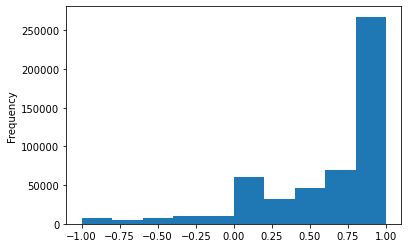

In [384]:
ts.sentiment.plot.hist()

In [385]:
# change date column to datetime format
ts.date = pd.to_datetime(ts.date, utc=True)
ts.info()

In [389]:
# change date column to datetime format
df.date = pd.to_datetime(df.date, utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   file        517401 non-null  object             
 1   message     517401 non-null  object             
 2   date        517401 non-null  datetime64[ns, UTC]
 3   content     517401 non-null  object             
 4   sender      517401 non-null  object             
 5   subject     517401 non-null  object             
 6   clean       517401 non-null  object             
 7   tokenize    517401 non-null  object             
 8   stop_words  517401 non-null  object             
 9   stemm       517401 non-null  object             
 10  lemmatize   517401 non-null  object             
 11  sentiment   517401 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(10)
memory usage: 47.4+ MB


In [390]:
# Set index at date columnad and sort index
ts = ts.set_index("date").sort_index()
ts.head()

,sentiment
date,
1980-01-01 00:00:00+00:00,0.6124
1980-01-01 00:00:00+00:00,0.0000
1980-01-01 00:00:00+00:00,0.9979
1980-01-01 00:00:00+00:00,0.7964
1980-01-01 00:00:00+00:00,0.8126


In [391]:
# Set Index as date column and sort index
df = df.set_index("date").sort_index()
df.head()

,file,message,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment
date,,,,,,,,,,,
1980-01-01 00:00:00+00:00,whalley-g/notes_inbox/1.,Message-ID: <26478103.1075845469034.JavaMail.e...,Critical Migration Information:\n\n1. Your sch...,outlook.team@enron.com,3 - URGENT - TO PREVENT LOSS OF INFORMATION,critical migration information\n\n1 your sched...,critical migration information\n\n1 your sched...,critical migration information 1 scheduled out...,critic migrat inform 1 your schedul outlook mi...,critical migration information 1 your schedule...,0.6124
1980-01-01 00:00:00+00:00,lay-k/all_documents/21.,Message-ID: <6457299.1075840201254.JavaMail.ev...,Calling All Alumni!\n \nUniversity of Ho...,rosalee.fleming@enron.com,University of Houston Reception,calling all alumni\n \nuniversity of hou...,calling all alumni\n \nuniversity of houston u...,calling alumni university houston university h...,call all alumni univers of houston univers of ...,calling all alumnus university of houston univ...,0.0000
1980-01-01 00:00:00+00:00,lay-k/all_documents/119.,Message-ID: <3823157.1075840203657.JavaMail.ev...,Letter dictated by Ken Lay\n\n\n\nHello Janice...,tori.wells@enron.com,Re: Update from cousins in Missouri,letter dictated by ken lay\n\n\n\nhello janice...,letter dictated by ken lay\n\n\n\nhello janice...,letter dictated ken lay hello janice enjoyed r...,letter dictat by ken lay hello janic i enjoy y...,letter dictated by ken lay hello janice i enjo...,0.9979
1980-01-01 00:00:00+00:00,lay-k/all_documents/1088.,Message-ID: <3298981.1075840289876.JavaMail.ev...,Mr. Sikes -\n\nKenneth L. Lay is the Chairman ...,rosalee.fleming@enron.com,Re: Energy TF Final Report,mr sikes \n\nkenneth l lay is the chairman of ...,mr sikes \n\nkenneth l lay is the chairman of ...,mr sikes kenneth l lay chairman enron position...,mr sike kenneth l lay is the chairman of enron...,mr sikes kenneth l lay is the chairman of enro...,0.7964
1980-01-01 00:00:00+00:00,mann-k/all_documents/3450.,Message-ID: <31290580.1075845660660.JavaMail.e...,"Hi Brian,\n\nHere are my observations/question...",kay.mann@enron.com,"Re: BlueDog Change Order #2, Rev 4",hi brian\n\nhere are my observationsquestions\...,hi brian\n\nhere are my observationsquestions\...,hi brian observationsquestions david marshall ...,hi brian here are my observationsquest ha davi...,hi brian here are my observationsquestions ha ...,0.8126


In [392]:
ts.index.dtype

datetime64[ns, UTC]

In [393]:
df.index.dtype

datetime64[ns, UTC]

In [394]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.head()

,file,message,content,sender,subject,clean,tokenize,stop_words,stemm,lemmatize,sentiment,year,month,day
date,,,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,whalley-g/notes_inbox/1.,Message-ID: <26478103.1075845469034.JavaMail.e...,Critical Migration Information:\n\n1. Your sch...,outlook.team@enron.com,3 - URGENT - TO PREVENT LOSS OF INFORMATION,critical migration information\n\n1 your sched...,critical migration information\n\n1 your sched...,critical migration information 1 scheduled out...,critic migrat inform 1 your schedul outlook mi...,critical migration information 1 your schedule...,0.6124,1980,1,1
1980-01-01 00:00:00+00:00,lay-k/all_documents/21.,Message-ID: <6457299.1075840201254.JavaMail.ev...,Calling All Alumni!\n \nUniversity of Ho...,rosalee.fleming@enron.com,University of Houston Reception,calling all alumni\n \nuniversity of hou...,calling all alumni\n \nuniversity of houston u...,calling alumni university houston university h...,call all alumni univers of houston univers of ...,calling all alumnus university of houston univ...,0.0000,1980,1,1
1980-01-01 00:00:00+00:00,lay-k/all_documents/119.,Message-ID: <3823157.1075840203657.JavaMail.ev...,Letter dictated by Ken Lay\n\n\n\nHello Janice...,tori.wells@enron.com,Re: Update from cousins in Missouri,letter dictated by ken lay\n\n\n\nhello janice...,letter dictated by ken lay\n\n\n\nhello janice...,letter dictated ken lay hello janice enjoyed r...,letter dictat by ken lay hello janic i enjoy y...,letter dictated by ken lay hello janice i enjo...,0.9979,1980,1,1
1980-01-01 00:00:00+00:00,lay-k/all_documents/1088.,Message-ID: <3298981.1075840289876.JavaMail.ev...,Mr. Sikes -\n\nKenneth L. Lay is the Chairman ...,rosalee.fleming@enron.com,Re: Energy TF Final Report,mr sikes \n\nkenneth l lay is the chairman of ...,mr sikes \n\nkenneth l lay is the chairman of ...,mr sikes kenneth l lay chairman enron position...,mr sike kenneth l lay is the chairman of enron...,mr sikes kenneth l lay is the chairman of enro...,0.7964,1980,1,1
1980-01-01 00:00:00+00:00,mann-k/all_documents/3450.,Message-ID: <31290580.1075845660660.JavaMail.e...,"Hi Brian,\n\nHere are my observations/question...",kay.mann@enron.com,"Re: BlueDog Change Order #2, Rev 4",hi brian\n\nhere are my observationsquestions\...,hi brian\n\nhere are my observationsquestions\...,hi brian observationsquestions david marshall ...,hi brian here are my observationsquest ha davi...,hi brian here are my observationsquestions ha ...,0.8126,1980,1,1


In [ ]:
import os
if not os.path.isfile('timedate.csv'):
    df.to_csv('timedate.csv')

In [ ]:
import os
if not os.path.isfile('timedate.csv'):
    df.to_csv('timedate.csv')

In [396]:
ts.index.min(), ts.index.max()

(Timestamp('1980-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2044-01-04 22:48:58+0000', tz='UTC'))

In [323]:
# check for time gaps
print('Number of rows:', df.index.nunique())
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

Number of rows: 224122
Number of days between first and last day: 23380 days 22:48:58


<AxesSubplot:xlabel='date'>

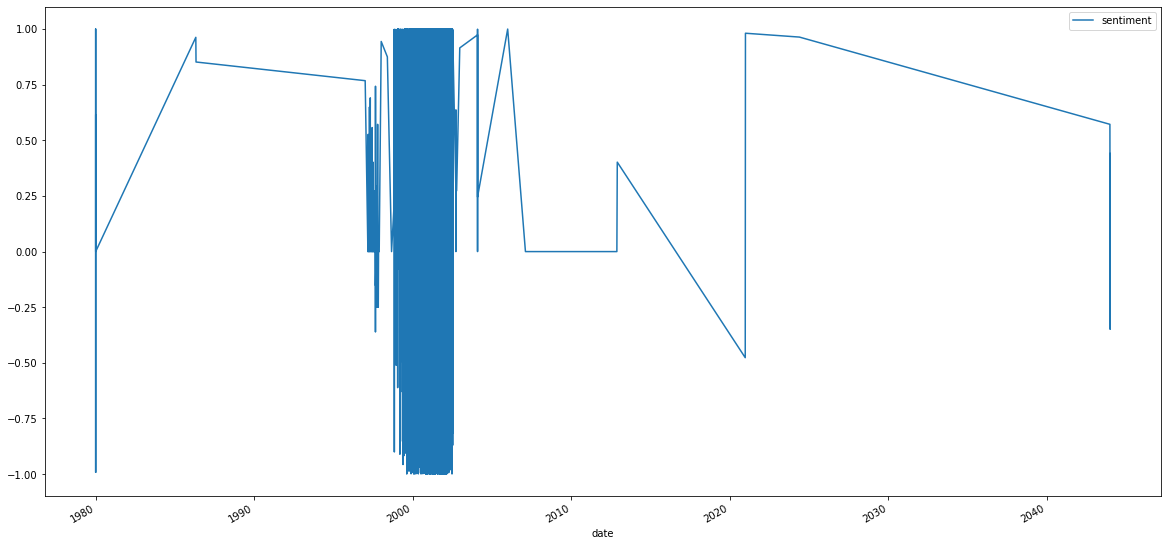

In [404]:
# plot sentiment over time
ts.plot(figsize=(20,10))

## Note:
- most emails occured by between 1998 and 2003
- Should remove emails outside of those dates

## Remove Emails Before 1998 and Afgter 2003

In [414]:
# Filter out rows that are below 1995 and above 2005
ts = ts[(ts.index > '1998') & (ts.index < '2003')]
ts.head()

,sentiment
date,
1998-01-04 17:46:00+00:00,0.9118
1998-01-06 01:32:00+00:00,0.9442
1998-01-06 01:32:00+00:00,0.9442
1998-01-06 01:32:00+00:00,0.9442
1998-05-27 15:31:00+00:00,0.8750


<AxesSubplot:xlabel='date'>

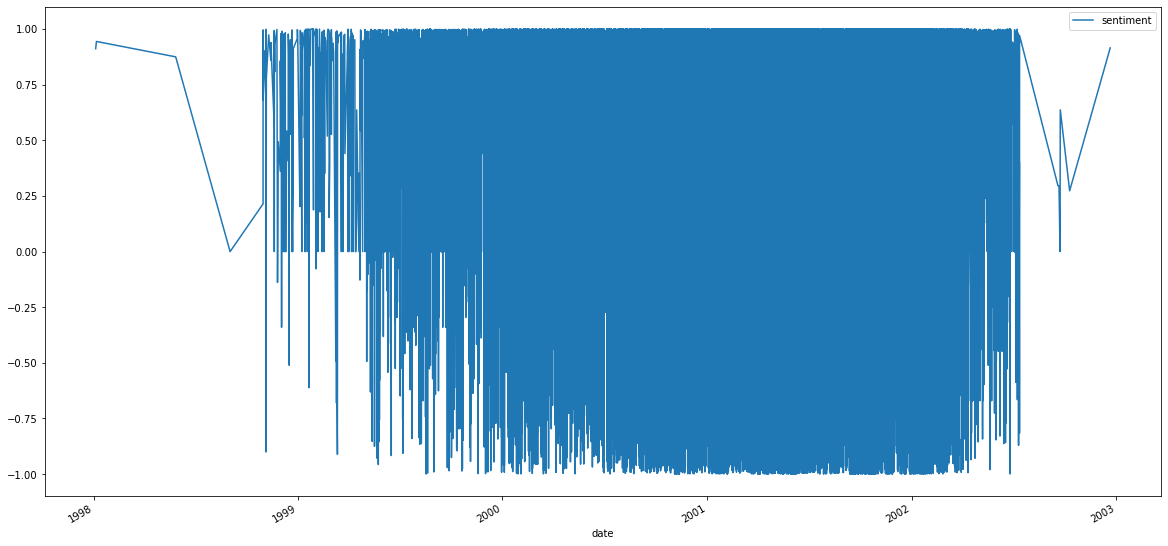

In [417]:
# Plot sentiment of email between 1998 and 2003
ts.plot(figsize=(20,10))

## Simple Moving Average with Backfill (Resample)

,sentiment
date,
1998-12-31 00:00:00+00:00,0.651698
1999-12-31 00:00:00+00:00,0.595870
2000-12-31 00:00:00+00:00,0.617552
2001-12-31 00:00:00+00:00,0.617656
2002-12-31 00:00:00+00:00,0.568093


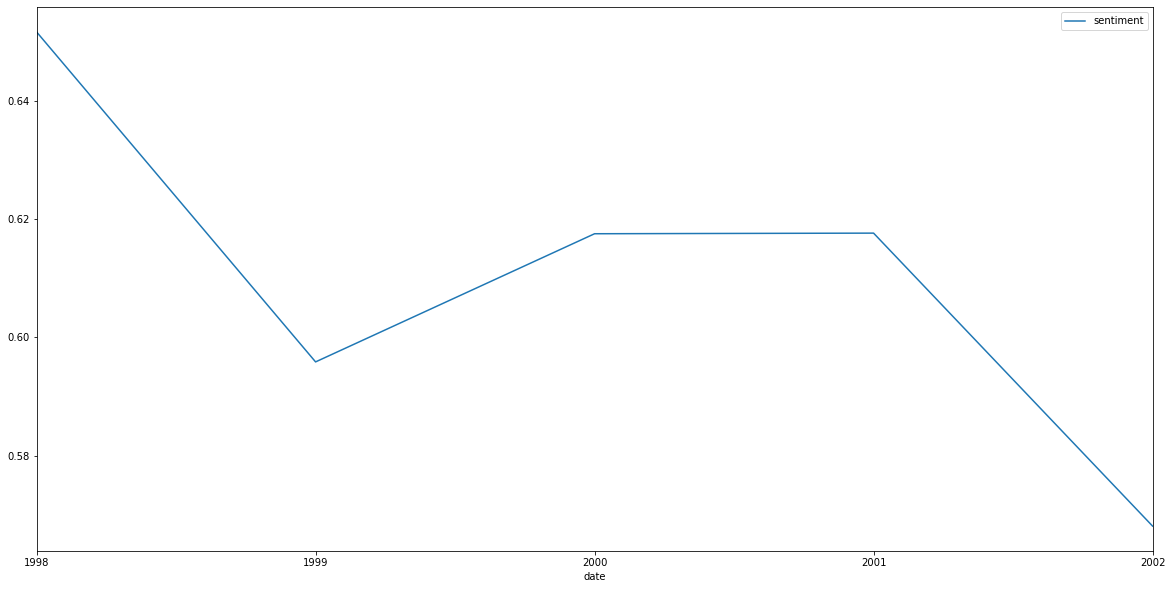

In [433]:
# Resample for Yearly
ts_1y = ts.resample('Y').mean().fillna(method='backfill')
ts_1y.plot(figsize=(20,10))
ts_1y.head()

,sentiment
date,
1998-01-31 00:00:00+00:00,0.936100
1998-04-30 00:00:00+00:00,0.875000
1998-07-31 00:00:00+00:00,0.875000
1998-10-31 00:00:00+00:00,0.573844
1999-01-31 00:00:00+00:00,0.708726


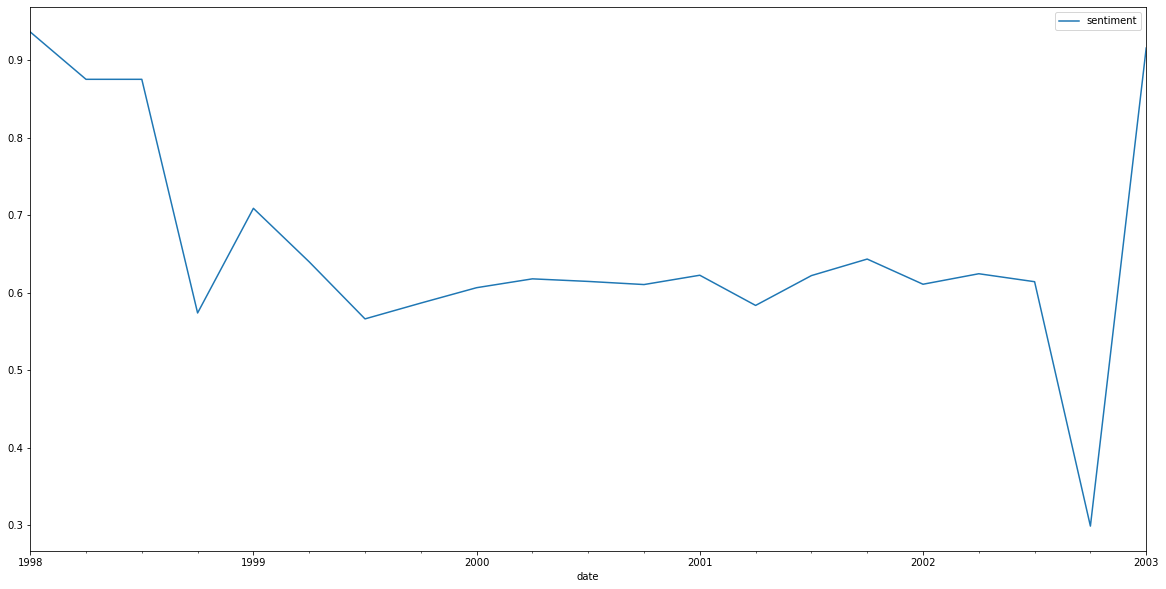

In [432]:
# Resample for Quarterly
ts_q = ts.resample('3M').mean().fillna(method='backfill')
ts_q.plot(figsize=(20,10))
ts_q.head()

,sentiment
date,
1998-01-31 00:00:00+00:00,0.9361
1998-02-28 00:00:00+00:00,0.8750
1998-03-31 00:00:00+00:00,0.8750
1998-04-30 00:00:00+00:00,0.8750
1998-05-31 00:00:00+00:00,0.8750


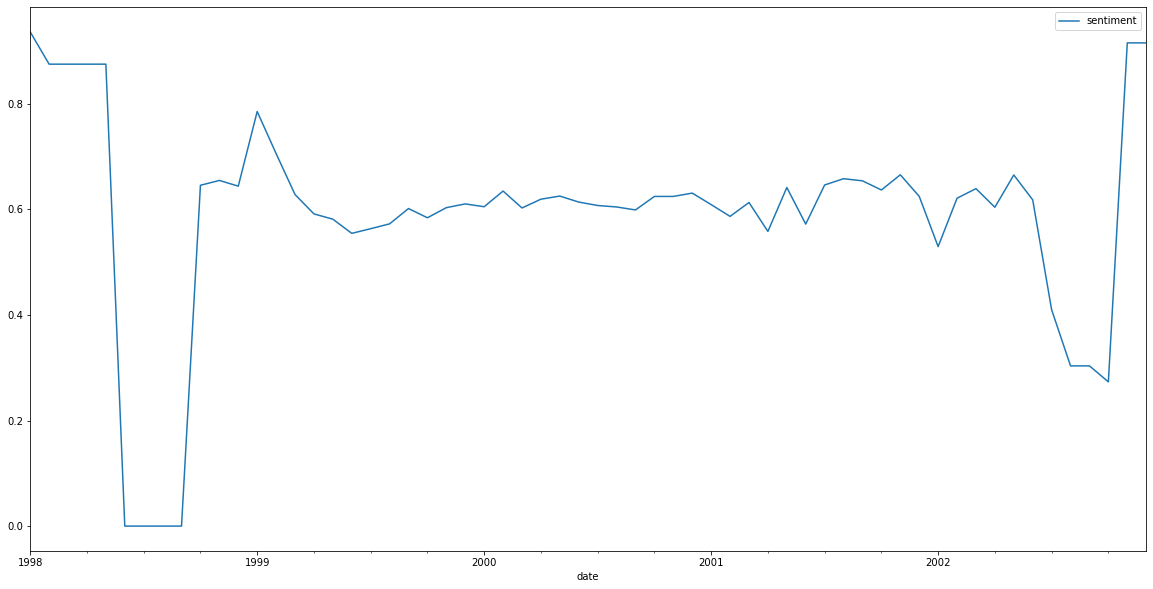

In [431]:
# Resample for Monthly
ts_30d = ts.resample('M').mean().fillna(method='backfill')
ts_30d.plot(figsize=(20,10))
ts_30d.head()

,sentiment
date,
1998-01-04 00:00:00+00:00,0.9118
1998-01-11 00:00:00+00:00,0.9442
1998-01-18 00:00:00+00:00,0.8750
1998-01-25 00:00:00+00:00,0.8750
1998-02-01 00:00:00+00:00,0.8750


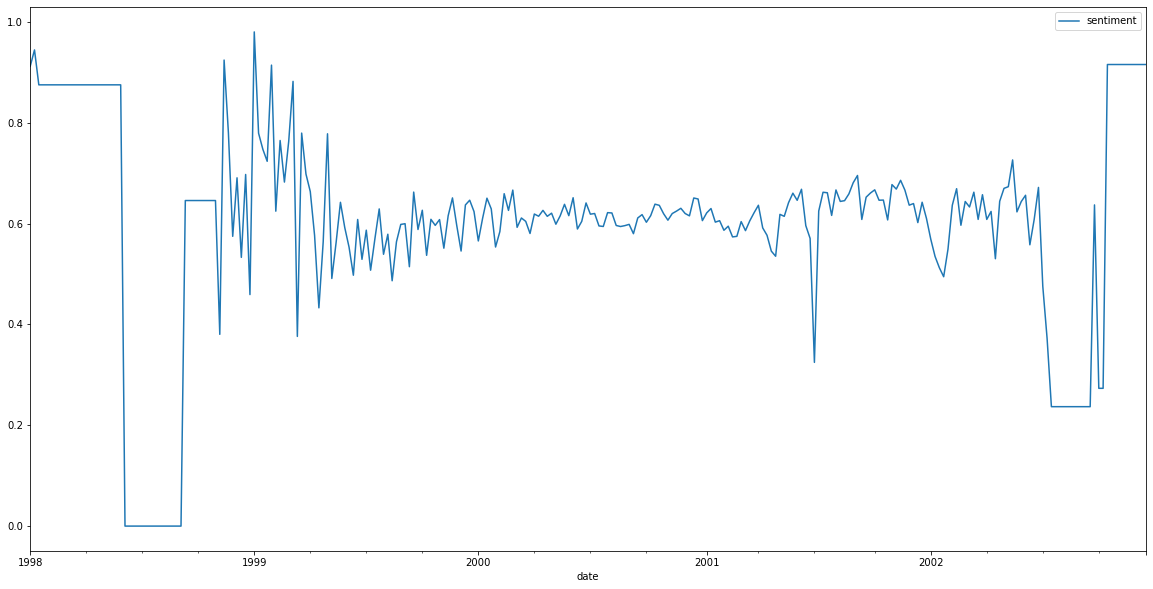

In [430]:
# Resample for Weekly
ts_7d = ts.resample('W').mean().fillna(method='backfill')
ts_7d.plot(figsize=(20,10))
ts_7d.head()

,sentiment
date,
1980-01-01 00:00:00+00:00,0.496716
1980-01-02 00:00:00+00:00,0.962800
1980-01-03 00:00:00+00:00,0.962800
1980-01-04 00:00:00+00:00,0.962800
1980-01-05 00:00:00+00:00,0.962800


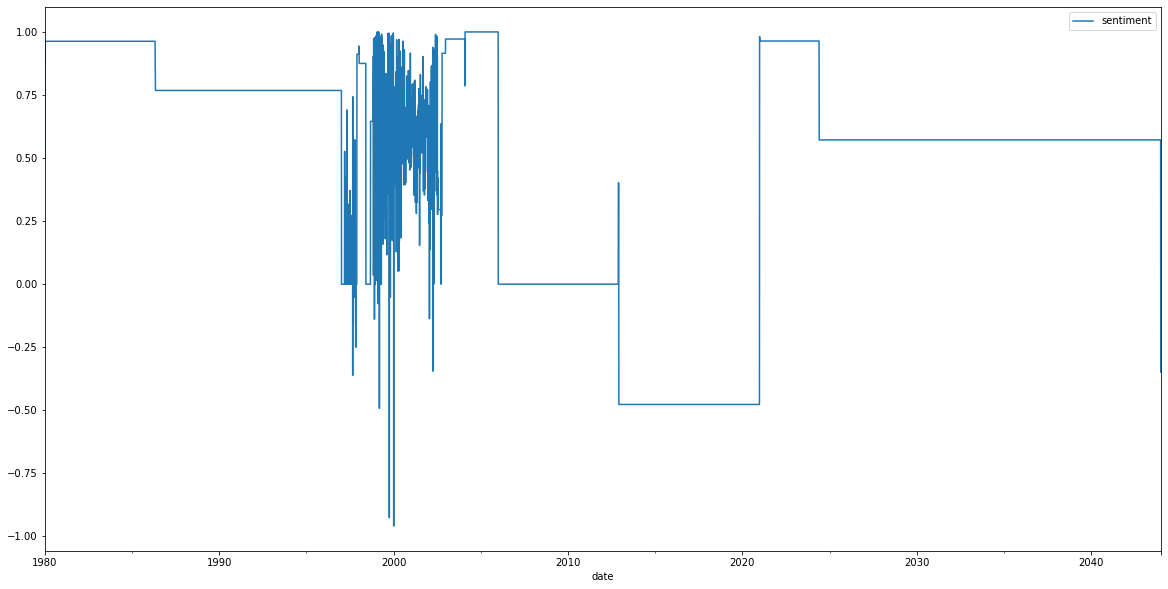

In [429]:
# Resample for Daily
df_1d = df_time.resample('D').mean().fillna(method='backfill')
df_1d.plot(figsize=(20,10))
df_1d.head()

## Rolling Average with Backfill

,sentiment,rolling_1w,rolling_4w,rolling_12w
date,,,,
1998-01-04 00:00:00+00:00,0.9118,0.9118,0.9015,0.883833
1998-01-11 00:00:00+00:00,0.9442,0.9442,0.9015,0.883833
1998-01-18 00:00:00+00:00,0.8750,0.8750,0.9015,0.883833
1998-01-25 00:00:00+00:00,0.8750,0.8750,0.9015,0.883833
1998-02-01 00:00:00+00:00,0.8750,0.8750,0.8923,0.883833


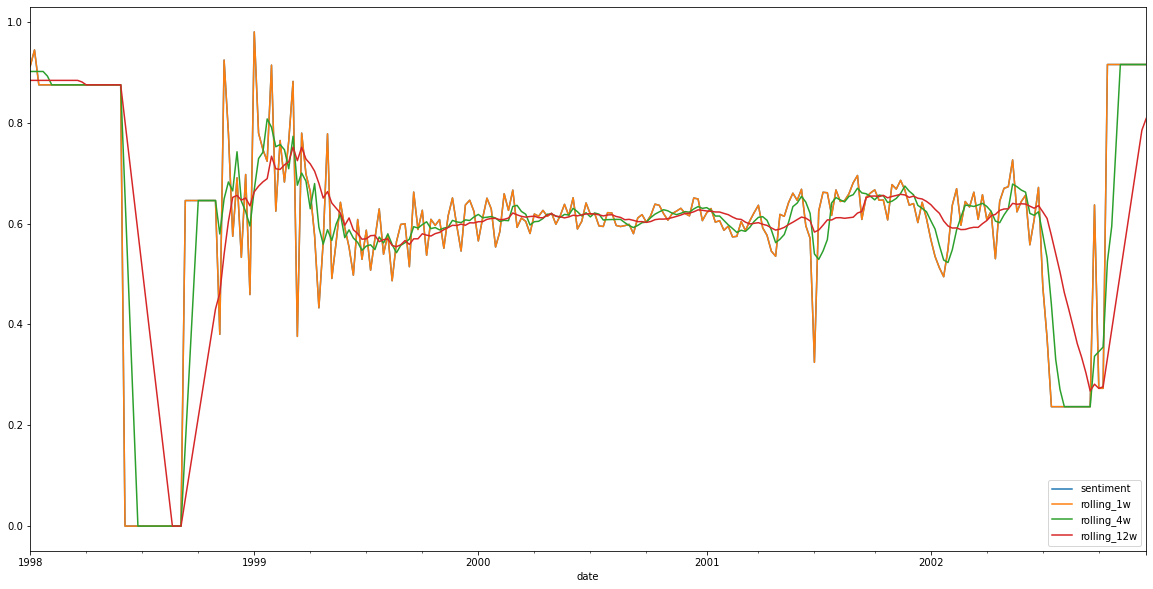

In [443]:
# Rolling Averages
rolling_ts = ts.resample('W').mean().fillna(method='backfill').assign(
    rolling_1w=lambda ts: ts.sentiment.rolling(1).mean().fillna(method='backfill'),
    rolling_4w=lambda ts: ts.sentiment.rolling(4).mean().fillna(method='backfill'),
    rolling_12w=lambda ts: ts.sentiment.rolling(12).mean().fillna(method='backfill'),
)
rolling_ts.plot(figsize=(20,10))
rolling_ts.head()

## Split: Last Year or Last 20% to Test

In [ ]:
train = df[:'2016'] # includes 2016
test = df['2017']

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Explore
- ???

## Questions to Explore:

- Question 1: How many messages were forwarded?
- Question 2: Did certain individuals forward more messages than others?
- Question 3: What messages were forwarded the most?
- Question 4: Were there any trends in messages with blind carbon copy recipients?/with certain blind carbon copy recipients?
- Question 5: Who were the top 5 / low 5 sentiment scores?
- Question 6: What department had the lowest average sentiment score?

In [ ]:
# see distribution of target variable
df.sentiment.plot.hist()

In [ ]:
# see target variable over time
df.sentiment.plot()

In [ ]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')

In [ ]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.datetime.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='temp', x='weekday')
)


In [ ]:
# Plot multiple resamples
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [ ]:
<matplotlib.legend.Legend at 0x407de86280>

In [ ]:
# Plot rolling averages
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

In [ ]:
<matplotlib.legend.Legend at 0x407e8ae100>

In [ ]:
# Plot Change over time
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')

In [ ]:
<AxesSubplot:title={'center':'Average week-to-week change in temperature'}, xlabel='datetime'>

In [ ]:
# Plot seasonality. unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [ ]:
<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='datetime'>

In [ ]:
# Seasonal Decomposition
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


In [ ]:
decomposition.iloc[:, 1:].plot()


In [ ]:
<AxesSubplot:xlabel='datetime'>


In [ ]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None


In [ ]:
# Plot categories over time
train = train.resample('D').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()


In [ ]:
# Work Around for order by Months
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None


## Visualizations and Statistical Testing
- For the statistical testing done on questions 3 and 4 the significance level equals 0.05.

## Exploration Summary:
- ???

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Model

- ???

## Pre-Process

### TD_IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(df.values())
tfidfs

In [ ]:
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

## Model

### Facebook Prophet

In [ ]:
from prophet import Prophet

# create prophet object
m = Propphet()

# fit prophet object to df with datetime and continuous value
m.fit(train_prophet)

In [ ]:
# create a fit dataframe that include 365 days into the future. this will be used to make a prediction
future = m.make_future.dataframe(periods=365)
future.tail()

In [ ]:
forecast = m.predict(future)
forcast[['ds','yaht','yhat','yhat_lower','yhat_upper']].tail()

In [ ]:
viz_1 = Prophet.plot(forecast)
viz_1

In [ ]:
# Plot forecast components like trend, yearly seasonality, and weekly seasonality of the time series
viz_2 = m.plot_components(forecast)

## Baseline

## Model 1: 

## Model 2: 

## Model 3: 

## Evaluation

<hr style="border:2px solid blue"> </hr>

# <font color = 'blue'> Conclusion </br>
## Summary:
- ???

## Recommendation:
- ???

## Next Steps:
- ???

## Load Pickle

In [ ]:
import pickle
pickle_file = open("eron_data", "rb")
objects = []
while True:
    try:
        objects.append(pickle.load(pickle_file))
    except EOFError:
        break
pickle_file.close()

print(objects)